In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

Text(0.5, 1.0, 'FLOPs and Bytes per DoF')

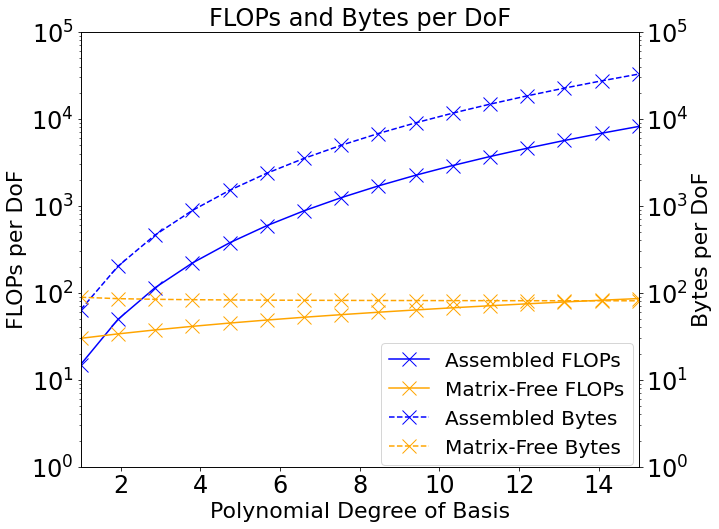

In [64]:
p = 16
P = np.linspace(2, p, p)
P_plt = np.linspace(1, p-1, p)

# Assembled
assembled_flops = [(2*p**6 - p**3)/p**3 for p in P]
assembled_entry = [8*(p**6)/p**3 for p in P]

# Matrix-free
matrixfree_flops = [(4*p**4 + (2*9+3+1)*p**3)/p**3 for p in P]
matrixfree_entry = [8*((9+1)*p**3 + 2*p**2 + 1)/p**3 for p in P]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_ylabel('FLOPs per DoF', fontsize=22)
ax1.set_yscale('log')
ax1.set_ylim([1, 10**5])

ax1.set_xlim([1, p-1])
ax1.set_xlabel('Polynomial Degree of Basis', fontsize=22)

ax2 = ax1.twinx()
ax2.set_ylabel('Bytes per DoF', fontsize=22)
ax2.set_yscale('log')
ax2.set_ylim([1, 10**5])

ax1.plot(P_plt, assembled_flops, label='Assembled FLOPs', marker='x', markersize=14, color='blue')
ax2.plot(P_plt, assembled_entry, label='Assembled Bytes', marker='x', markersize=14, color='blue', linestyle='dashed')
ax1.plot(P_plt, matrixfree_flops, label='Matrix-Free FLOPs', marker='x', markersize=14, color='orange')
ax2.plot(P_plt, matrixfree_entry, label='Matrix-Free Bytes', marker='x', markersize=14, color='orange', linestyle='dashed')

fig.legend(fontsize=20, loc=[0.53,0.12])
ax1.set_title('FLOPs and Bytes per DoF', fontsize=24)

Text(0.5, 0, 'Polynomial Degree of Basis')

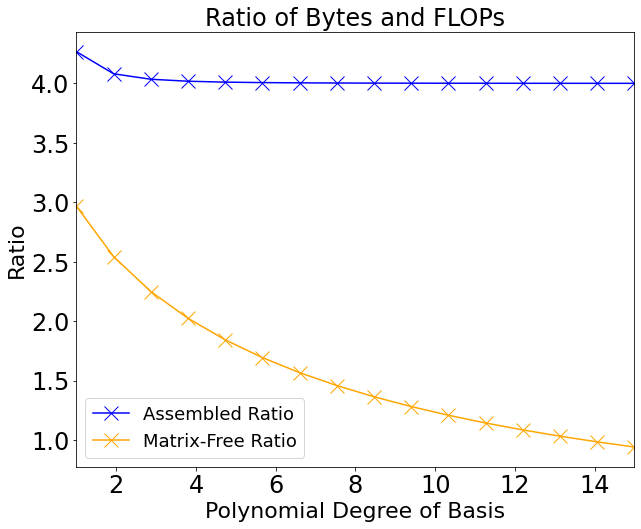

In [62]:
p = 16
P = np.linspace(2, p, p)
P_plt = np.linspace(1, p-1, p)

# Assembled
assembled_flops = [(2*p**6 - p**3)/p**3 for p in P]
assembled_entry = [8*(p**6)/p**3 for p in P]
assembled_balance = [assembled_entry[i]/assembled_flops[i] for i in range(p)]

# Matrix-free
matrixfree_flops = [(4*p**4 + (2*9+3+1)*p**3)/p**3 for p in P]
matrixfree_entry = [8*((9+1)*p**3 + 2*p**2 + 1)/p**3 for p in P]
matrixfree_balance = [matrixfree_entry[i]/matrixfree_flops[i] for i in range(p)]

# Plot
plt.figure(figsize=(10, 8))

plt.xlim([1, p-1])

plt.plot(P_plt, assembled_balance, label='Assembled Ratio', marker='x', markersize=14, color='blue')
plt.plot(P_plt, matrixfree_balance, label='Matrix-Free Ratio', marker='x', markersize=14, color='orange')

plt.legend(fontsize=18)
plt.title('Ratio of Bytes and FLOPs', fontsize=24)
plt.ylabel('Ratio', fontsize=22)
plt.xlabel('Polynomial Degree of Basis', fontsize=22)

In [11]:
#Year  GFLOPs-SP   GFLOPs-DP   Pixel-Shader    Mem-BW     TDP   CUs    Freq(MHz)   Name
AMD = [
[2007,      496,         99,       320,           72,    106,    4,   777,        "Radeon HD 3870"],
[2008,     1200,        240,       800,         115,    150,   10,   750,        "Radeon HD 4870"],
[2009,     2720,        544,      1600,          154,    228,   20,   850,        "Radeon HD 5870"],
[2010,     2703,        675,      1536,          176,    250,   24,   880,        "Radeon HD 6970"],
[2011,     2703,        675,      1536,          176,    250,   24,   880,        "Radeon HD 6970"],
[2012,     4096,       1024,      2048,          288,    250,   32,   1000,       "Radeon HD 7970 GHz Ed."],
[2013,     4300,       1075,      2048,          288,    250,   40,   1000,       "Radeon HD 8970"],
[2014,     5238,       2619,      2816,          320,    275,   44,   930,        "FirePro W9100"],
[2015,     5240,       2620,      2816,          320,    275,   44,   930,        "FirePro S9170"],
[2018,    14725,       7362,      4096,         1024,    300,   64,   1800,       "Radeon Instinct MI60"]]

#Year   GFLOPs   Pixel-Shader      Mem-BW       TDP   SMs  Freq(MHz)       Name
NVIDIA = [
[2008,      78,        240,           102,      188,   30,   1296,        "Tesla C1060"],
[2009,      78,        240,           102,      188,   30,   1296,        "Tesla C1060"],
[2010,     515,        448,           144,      238,   14,   1150,        "Tesla C2050"],
[2011,     666,        512,           177,      250,   16,   1300,        "Tesla M2090"],
[2012,    1173,       2496,           208,      225,   13,    706,        "Tesla K20"],
[2013,    1312,       2688,           250,      250,   14,    732,        "Tesla K20X"],
[2014,    1430,       2880,           288,      235,   15,    745,        "Tesla K40"],
[2015,    1430,       2880,           288,      235,   15,    745,        "Tesla K40"],
[2016,    4700,       3584,           720,      250,   56,   1328,        "Tesla P100"],
[2017,    7800,       5120,           900,      300,   80,   1455,        "Tesla V100"]]

#Year   GFLOPs-SP   GFLOPs-DP  Cores  Mem-BW/Socket         TDP   Freq(MHz)     Name
INTEL = [
[2007,      102,         51,       4,           26,         150,   3200,       "Xeon X5482"],
[2008,      108,         54,       4,           26,         150,   3400,       "Xeon X5492"],
[2009,      106,         53,       4,           32,         130,   3300,       "Xeon W5590"],
[2010,      160,         80,       6,           32,         130,   3300,       "Xeon X5680"],
[2011,      166,         83,       6,           32,         130,   3470,       "Xeon X5690"],
[2012,      372,        186,       8,           51,         135,   2900,       "Xeon E5-2690"],
[2013,      518,        259,      12,           60,         130,   2700,       "Xeon E5-2697 v2"],
[2014,     1324,        662,      18,           68,         145,   2300,       "Xeon E5-2699 v3"],
[2015,     1324,        662,      18,           68,         145,   2300,       "Xeon E5-2699 v3"],
[2016,     1548,        774,      22,           77,         145,   2200,       "Xeon E5-2699 v4"],
[2017,     4480,       2240,      28,          120,         205,   2500,       "Xeon Platinum 8180"],
[2018,     9320,       4660,      56,          175,         400,   2600,       "Xeon Platinum 9282"]]


plt.rcParams.update({'font.size': 24})

Text(0.5, 1.0, 'Theoretical Peak FLOPs and Bandwidth')

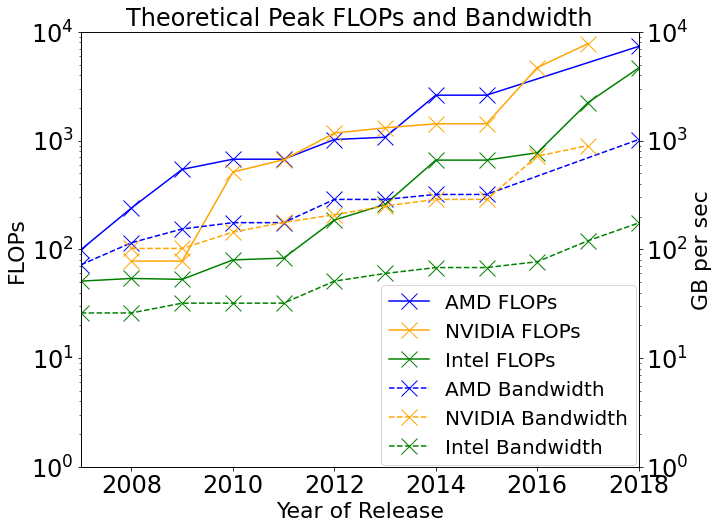

In [57]:
# FLOPs
AMD_flops = [AMD[i][2] for i in range(len(AMD))]
NVIDIA_flops = [NVIDIA[i][1] for i in range(len(NVIDIA))]
INTEL_flops = [INTEL[i][2] for i in range(len(INTEL))]

# Bandwidth
AMD_bandwidth = [AMD[i][4] for i in range(len(AMD))]
NVIDIA_bandwidth = [NVIDIA[i][3] for i in range(len(NVIDIA))]
INTEL_bandwidth = [INTEL[i][4] for i in range(len(INTEL))]

# Range
AMD_years = [AMD[i][0] for i in range(len(AMD))]
NVIDIA_years = [NVIDIA[i][0] for i in range(len(NVIDIA))]
INTEL_years = [INTEL[i][0] for i in range(len(INTEL))]

# Plot
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_ylabel('FLOPs', fontsize=22)
ax1.set_yscale('log')
ax1.set_ylim([1, 10**4])

ax1.set_xlim([2007, 2018])
ax1.set_xlabel('Year of Release', fontsize=22)

ax2 = ax1.twinx()
ax2.set_ylabel('GB per sec', fontsize=22)
ax2.set_yscale('log')
ax2.set_ylim([1, 10**4])

ax1.plot(AMD_years, AMD_flops, label='AMD FLOPs', marker='x', markersize=16, color='blue')
ax2.plot(AMD_years, AMD_bandwidth, label='AMD Bandwidth', marker='x', markersize=16, color='blue', linestyle='dashed')
ax1.plot(NVIDIA_years, NVIDIA_flops, label='NVIDIA FLOPs', marker='x', markersize=16, color='orange')
ax2.plot(NVIDIA_years, NVIDIA_bandwidth, label='NVIDIA Bandwidth', marker='x', markersize=16, color='orange', linestyle='dashed')
ax1.plot(INTEL_years, INTEL_flops, label='Intel FLOPs', marker='x', markersize=16, color='green')
ax2.plot(INTEL_years, INTEL_bandwidth, label='Intel Bandwidth', marker='x', markersize=16, color='green', linestyle='dashed')

fig.legend(fontsize=20, loc=[0.53,0.12])
ax1.set_title('Theoretical Peak FLOPs and Bandwidth', fontsize=24)

Text(0.5, 0, 'Year of Release')

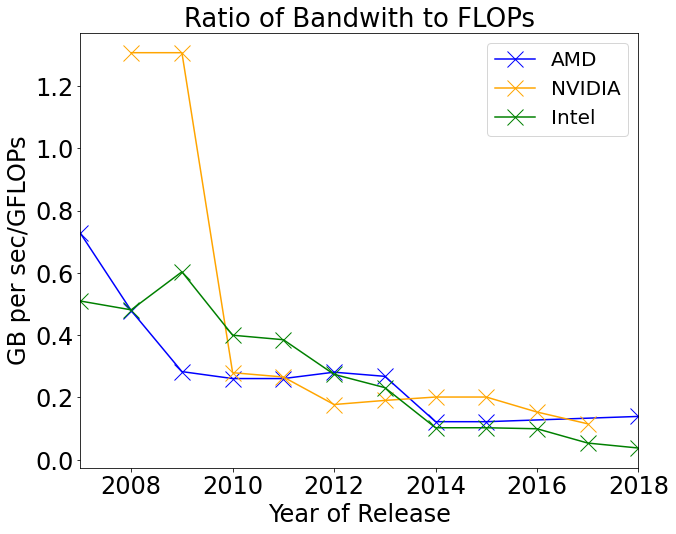

In [59]:
# Ratio
AMD_ratio = [AMD_bandwidth[i]/AMD_flops[i] for i in range(len(AMD))]
NVIDIA_ratio = [NVIDIA_bandwidth[i]/NVIDIA_flops[i] for i in range(len(NVIDIA))]
INTEL_ratio = [INTEL_bandwidth[i]/INTEL_flops[i] for i in range(len(INTEL))]

# Range
AMD_years = [AMD[i][0] for i in range(len(AMD))]
NVIDIA_years = [NVIDIA[i][0] for i in range(len(NVIDIA))]
INTEL_years = [INTEL[i][0] for i in range(len(INTEL))]

# Plot
plt.figure(figsize=(10, 8))

plt.xlim([2007, 2018])

plt.plot(AMD_years, AMD_ratio, label='AMD', marker='x', markersize=16, color='blue')
plt.plot(NVIDIA_years, NVIDIA_ratio, label='NVIDIA', marker='x', markersize=16, color='orange')
plt.plot(INTEL_years, INTEL_ratio, label='Intel', marker='x', markersize=16, color='green')

plt.legend(fontsize=20)
plt.title('Ratio of Bandwith to FLOPs', fontsize=26)
plt.ylabel('GB per sec/GFLOPs', fontsize=24)
plt.xlabel('Year of Release', fontsize=24)